In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency='W'
gronum1=50
path1='C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\'

In [4]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
yiziban0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\yiziban.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
yiziban0=pd.read_csv(yiziban0,parse_dates=True,index_col=0,encoding='gbk')
yiziban0=dadjust(yiziban0)
stfre=np.unique(stdata0.index)

In [5]:
for i in range(len(stfre)-1):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    yzb0=yiziban0.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        yzb=pd.DataFrame(yzb0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            yzb1=yzb0[len(yzb0)-1:len(yzb0)]
            yzb=yzb.append(yzb1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002) 
            yzb2=pd.DataFrame(yzb0).T
            yzb=yzb.append(yzb2)

In [6]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [7]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [29]:
file={}
name1=os.listdir(path1)

In [9]:
del name1[11]

In [30]:
name1

['cmvalue.csv',
 'EBIT息税前利润.csv',
 'marketvalue.csv',
 'PB.csv',
 'PCF.csv',
 'PE.csv',
 'PS.csv',
 '净资产收益率.csv',
 '周成交金额.csv',
 '周振幅2.csv',
 '周换手率2.csv',
 '周涨幅2.csv',
 '开盘价.csv',
 '每股公积金.csv',
 '每股收益增长率.csv',
 '营业利润率.csv',
 '营业收入增长率.csv',
 '资产负债率.csv']

In [31]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [32]:
ic={}
for mu in range(len(key)):
    ic[key[mu]]={}

In [33]:
dic={}
group={}
n_group={}
n_dic={}
all_index={}
for i in range(len(fre)+1):
    tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    yzb_index=yzb.loc[fre[i-1]]
    yzb_index=yzb_index[yzb_index==0].T.index
    d_gindex=ust[dindex].dropna().index
    d_gindex=d_gindex&yzb_index
    profit=pd.DataFrame(errate1[d_gindex].loc[fre[i-1]].dropna().astype(float))
    if i ==0:
        n_dic[i]=0
    else:
        ind=0
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            d_gindex=d_gindex&data1.index
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            data1=data1.dropna().astype(float)
            d2_gindex=data1.index&profit.index
            data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
            data1=data1.loc[d2_gindex]
            #x=sm.add_constant(data1)
            profit=profit.loc[d2_gindex]
            ic[key[mu]][fre[i-1]]=np.corrcoef(profit.T.values[0],data1.T.values[0])[0][1]
            #co_data=pd.concat([profit,data1],axis=1,join='inner')#
       
        '''c_data=data1*co_data.corr().values[0][1]
            if ind==0:
                n_data=copy.deepcopy(c_data)
                ind=1
            else:
                n_data=n_data+c_data
            model=sm.OLS(profit,x)
            result=model.fit()
            if result.pvalues[1:2][0]<0.05:
                c_data=data1*result.params[1:2].values[0]
                if ind==0:
                    n_data=copy.deepcopy(c_data)
                    ind=1
                else:
                    n_data=n_data+c_data 
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)
        '''

In [40]:
ic[key[mu]]

{'2009-12-28/2010-01-03': 0.084579058949358202,
 '2010-01-04/2010-01-10': -0.082233992289866734,
 '2010-01-11/2010-01-17': -0.24813612170200958,
 '2010-01-18/2010-01-24': 0.15141693130231434,
 '2010-01-25/2010-01-31': -0.12765343761159401,
 '2010-02-01/2010-02-07': 0.11724984435896228,
 '2010-02-08/2010-02-14': -0.10464893608326813,
 '2010-02-22/2010-02-28': -0.008981986337076267,
 '2010-03-01/2010-03-07': 0.051810201886720822,
 '2010-03-08/2010-03-14': -0.02391788916257833,
 '2010-03-15/2010-03-21': -0.0034686434181940475,
 '2010-03-22/2010-03-28': -0.14241700241292155,
 '2010-03-29/2010-04-04': 0.074278004904375167,
 '2010-04-05/2010-04-11': -0.23766219370568437,
 '2010-04-12/2010-04-18': 0.079696139284081952,
 '2010-04-19/2010-04-25': -0.21830096496356285,
 '2010-04-26/2010-05-02': 0.16955804958052115,
 '2010-05-03/2010-05-09': -0.16425514186413914,
 '2010-05-10/2010-05-16': 0.15257524617013563,
 '2010-05-17/2010-05-23': -0.050975705118692802,
 '2010-05-24/2010-05-30': -0.1234575363

In [54]:
pd.DataFrame(ic[key[mu]],index=ic[key[mu]].keys())[0:1].T

2010-06-21/2010-06-27   -4.328639
dtype: float64

In [64]:
pd.DataFrame(ic[key[mu]].values(),index=ic[key[mu].keys()

SyntaxError: unexpected EOF while parsing (<ipython-input-64-86707bc09181>, line 1)

In [36]:
ic[key[mu]].keys()

dict_keys(['2010-06-21/2010-06-27', '2014-02-10/2014-02-16', '2010-04-26/2010-05-02', '2011-05-23/2011-05-29', '2014-08-11/2014-08-17', '2011-06-13/2011-06-19', '2014-02-17/2014-02-23', '2011-01-24/2011-01-30', '2012-03-26/2012-04-01', '2011-09-12/2011-09-18', '2014-03-31/2014-04-06', '2011-08-15/2011-08-21', '2012-09-03/2012-09-09', '2010-08-16/2010-08-22', '2013-07-15/2013-07-21', '2014-07-28/2014-08-03', '2010-02-08/2010-02-14', '2015-08-17/2015-08-23', '2014-11-17/2014-11-23', '2015-05-18/2015-05-24', '2011-10-24/2011-10-30', '2010-06-07/2010-06-13', '2012-03-19/2012-03-25', '2010-12-20/2010-12-26', '2012-03-12/2012-03-18', '2013-09-09/2013-09-15', '2013-04-08/2013-04-14', '2015-07-20/2015-07-26', '2014-01-06/2014-01-12', '2013-12-30/2014-01-05', '2014-11-03/2014-11-09', '2014-12-08/2014-12-14', '2013-08-12/2013-08-18', '2011-08-08/2011-08-14', '2015-12-28/2016-01-03', '2015-01-12/2015-01-18', '2016-03-28/2016-04-03', '2015-08-10/2015-08-16', '2013-07-22/2013-07-28', '2011-01-17/20

In [52]:
n_mrate=np.zeros(len(fre)-1)
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(len(fre)-1):
        n_mrate[i]=errate1[n_dic[i+1][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()

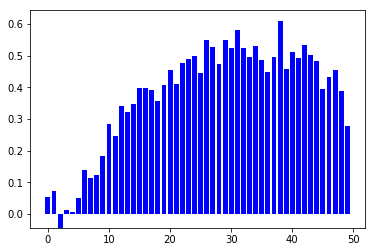

In [53]:
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
plt.show()

In [54]:
unitnet0=n_dicrate[49]-0.2
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

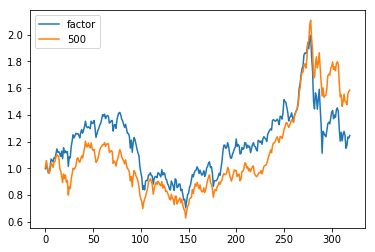

In [55]:
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()